In [15]:
#Import Boston Dataset from sklearn dataset class.
from sklearn.datasets import load_boston
#Import numerical libraries
import pandas as pd
import numpy as np

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [4]:
Xb,yb =load_boston(return_X_y=True)

df_boston = pd.DataFrame(Xb,columns = load_boston().feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
df_boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

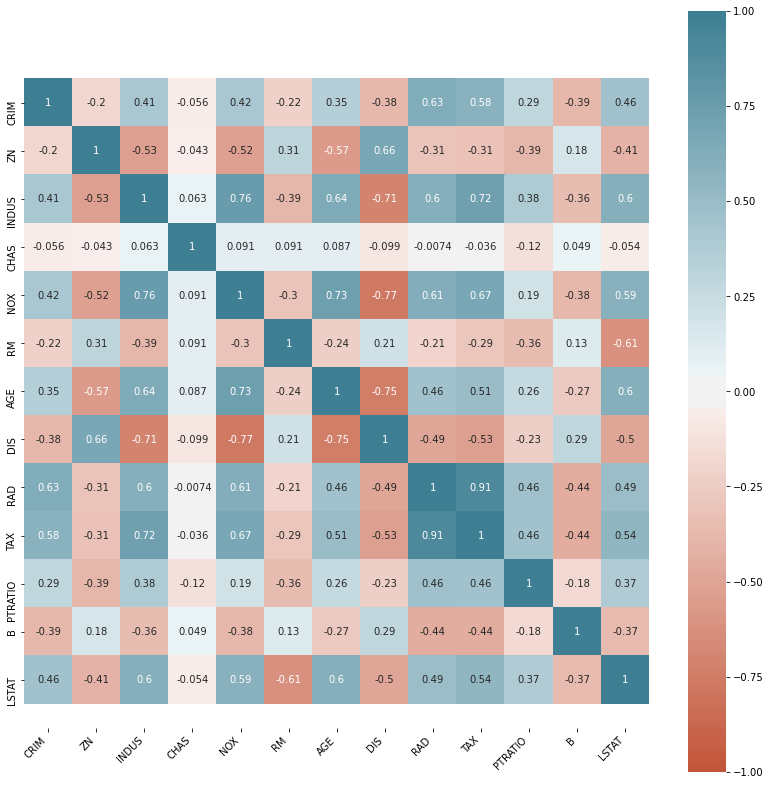

In [11]:
# Correlation of the features
import seaborn as sns
corr = df_boston.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [12]:
#Check for Duplicates
df_boston.duplicated().any()

False

In [18]:
#Outlier Detection
from sklearn.ensemble import IsolationForest
from scipy import stats

In [22]:
z = np.abs(stats.zscore(df_boston))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [23]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

91

In [24]:
new_df = df_boston.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
411,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
412,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
413,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [25]:
y_new = yb[list(new_df["index"])]
X_new = new_df.drop('index', axis = 1)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)

In [26]:
#Split into train, test set

X_train, X_test, y_train,y_test = train_test_split(X_scaled, y_new, test_size = 0.30, random_state = 102)
X_train.shape

(290, 13)

In [27]:
#Fit simple linear model and find coefficients
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print(f'Regression model coef: {regression_model.coef_}')

Regression model coef: [-6.01654802e-01 -8.30213521e-02 -9.34368671e-02  1.11022302e-16
 -1.09640558e+00  2.94375298e+00 -3.15406399e-01 -2.10781452e+00
  1.74596936e+00 -1.55829638e+00 -2.09008117e+00  4.19683006e-01
 -3.13118127e+00]


In [28]:
# Regularized Ridge Regression
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')

Ridge model coef: [-0.59665168 -0.08497558 -0.10115392  0.         -1.08672438  2.94488557
 -0.31610194 -2.09942134  1.7221012  -1.53858765 -2.08598741  0.41963066
 -3.12836245]


In [29]:
ridge_model2 = Ridge(alpha = 0.4)
ridge_model2.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model2.coef_}')

Ridge model coef: [-0.5950194  -0.0856094  -0.10367072  0.         -1.08354456  2.9452513
 -0.31632613 -2.09664634  1.71429247 -1.53215188 -2.08463495  0.41961249
 -3.12741624]


In [30]:
ridge_model3 = Ridge(alpha = 0.5)
ridge_model3.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model3.coef_}')

Ridge model coef: [-0.59340442 -0.08623464 -0.10616044  0.         -1.08038789  2.94561123
 -0.31654658 -2.09388253  1.70655565 -1.52578138 -2.08328845  0.41959396
 -3.12646686]


In [32]:
ridge_model4 = Ridge(alpha = 0.6)
ridge_model4.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model4.coef_}')

Ridge model coef: [-0.59180648 -0.08685141 -0.10862348  0.         -1.0772541   2.94596544
 -0.31676334 -2.09112982  1.69888972 -1.51947517 -2.08194784  0.41957507
 -3.12551437]


In [33]:
ridge_model5 = Ridge(alpha = 0.7)
ridge_model5.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model5.coef_}')

Ridge model coef: [-0.59022534 -0.08745985 -0.11106026  0.         -1.07414291  2.94631398
 -0.31697646 -2.08838811  1.69129368 -1.51323231 -2.08061305  0.41955583
 -3.12455884]


In [34]:
# Regularized Lasso Regression
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')


Lasso model coef: [-0.59626032 -0.08187659 -0.09420709  0.         -1.09011312  2.94395858
 -0.31346929 -2.10203141  1.731493   -1.54974204 -2.08714546  0.41901626
 -3.13338363]


In [35]:
lasso_model2 = Lasso(alpha = 0.002)
lasso_model2.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model2.coef_}')

Lasso model coef: [-0.59078721 -0.08075248 -0.09491926  0.         -1.08373595  2.94418644
 -0.31154572 -2.09617631  1.71691852 -1.54120076 -2.08420307  0.41836119
 -3.13561461]


In [36]:
lasso_model3 = Lasso(alpha = 0.003)
lasso_model3.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model3.coef_}')

Lasso model coef: [-0.58532872 -0.07964589 -0.09562902  0.         -1.07741127  2.94443905
 -0.30964783 -2.09033387  1.70234243 -1.532633   -2.08126928  0.4177052
 -3.13779881]


In [37]:
lasso_model4 = Lasso(alpha = 0.003)
lasso_model4.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model4.coef_}')

Lasso model coef: [-0.58532872 -0.07964589 -0.09562902  0.         -1.07741127  2.94443905
 -0.30964783 -2.09033387  1.70234243 -1.532633   -2.08126928  0.4177052
 -3.13779881]


In [38]:
lasso_model5 = Lasso(alpha = 0.005)
lasso_model5.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model5.coef_}')

Lasso model coef: [-0.57433693 -0.07744697 -0.09700616  0.         -1.06467593  2.94495758
 -0.30585765 -2.07858607  1.67309377 -1.51550353 -2.07539267  0.41640297
 -3.14220351]


In [39]:
# Score Comparison
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 



#Lasso
print("Lasso Train1: ", lasso_model.score(X_train, y_train))
print("Lasso Test1: ", lasso_model.score(X_test, y_test))
print('*************************')
print("Lasso Train2: ", lasso_model2.score(X_train, y_train))
print("Lasso Test2: ", lasso_model2.score(X_test, y_test))
print('*************************')
print("Lasso Train3: ", lasso_model3.score(X_train, y_train))
print("Lasso Test3: ", lasso_model3.score(X_test, y_test))
print('*************************')
print("Lasso Train4: ", lasso_model4.score(X_train, y_train))
print("Lasso Test4: ", lasso_model4.score(X_test, y_test))
print('*************************')
print("Lasso Train5: ", lasso_model5.score(X_train, y_train))
print("Lasso Test5: ", lasso_model5.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train1: ", ridge_model.score(X_train, y_train))
print("Ridge Test1: ", ridge_model.score(X_test, y_test))
print('*************************')
print("Ridge Train2: ", ridge_model2.score(X_train, y_train))
print("Ridge Test2: ", ridge_model2.score(X_test, y_test))
print('*************************')
print("Ridge Train3: ", ridge_model3.score(X_train, y_train))
print("Ridge Test3: ", ridge_model3.score(X_test, y_test))
print('*************************')
print("Ridge Train4: ", ridge_model4.score(X_train, y_train))
print("Ridge Test4: ", ridge_model4.score(X_test, y_test))
print('*************************')
print("Ridge Train5: ", ridge_model5.score(X_train, y_train))
print("Ridge Test5: ", ridge_model5.score(X_test, y_test))
print('*************************')

Lasso Train1:  0.7268378309932233
Lasso Test1:  0.7745128182678622
*************************
Lasso Train2:  0.7268357490536
Lasso Test2:  0.7744344971197954
*************************
Lasso Train3:  0.7268322806062917
Lasso Test3:  0.7743554101511261
*************************
Lasso Train4:  0.7268322806062917
Lasso Test4:  0.7743554101511261
*************************
Lasso Train5:  0.7268211315060586
Lasso Test5:  0.7741922134740709
*************************
Ridge Train1:  0.7268366480487711
Ridge Test1:  0.7744606328531052
*************************
Ridge Train2:  0.7268352161625828
Ridge Test2:  0.7744180817908545
*************************
Ridge Train3:  0.7268333942137137
Ridge Test3:  0.7743756554300522
*************************
Ridge Train4:  0.7268311902967814
Ridge Test4:  0.7743333545977716
*************************
Ridge Train5:  0.7268286122891532
Ridge Test5:  0.7742911800355136
*************************


In [ ]:
#Best model is Lasso Regression model with alpha being 0.001